In [15]:

#pip install nbformat --upgrade

In [16]:
import nbformat
print(nbformat.__version__)

5.9.2


In [17]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Graficas de los Portatiles
df_portatiles = pd.read_csv('productos_portatiles_actualizado.csv')
df_portatiles.head()


,producto_id,timestamp,nombre,url,precio,precio_tachado,rating,opiniones,categoria_id,descuento_porcentaje,marca
0,1,2025-02-28 08:40:09,Acer TravelMate P2 TMP214-55-TCO-51RL Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,758.98,758.98,4.7,7386,4,0.0,Acer
1,2,2025-02-28 08:40:24,Portátil Acer TravelMate P2 TMP215-54-584F Int...,https://www.pccomponentes.com/portatil-acer-tr...,728.79,728.79,3.8,271,4,0.0,Acer
2,3,2025-02-28 08:40:41,Acer TravelMate P2 TMP215-54-71UZ Intel Core i...,https://www.pccomponentes.com/acer-travelmate-...,912.04,912.04,4.7,7386,1,0.0,Acer
3,4,2025-02-28 08:40:57,Acer TravelMate P2 TMP216-51-TCO-346K Netbook ...,https://www.pccomponentes.com/acer-travelmate-...,769.60,769.60,3.8,271,4,0.0,Acer
4,5,2025-02-28 08:41:11,Acer TravelMate P2 TMP216-51-TCO-5584 Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,842.33,842.33,0.0,0,4,0.0,Acer


In [19]:
df_caracteristicas = pd.read_csv('caracteristicas_portatiles_actualizado.csv')
df_caracteristicas.head()

,producto_id,Processor Speed,Processor Cores,RAM Gbs,Storage Gbs,Display Inches,GPU Model,USB Ports,Operating System,Weight,Battery mAh
0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,2.6,8.0,16.0,512.0,15.4,NVidia,3.0,NaN,NaN,NaN
2,3,4.7,10.0,16.0,512.0,15.6,Intel,4.0,Windows,1.9,NaN
3,4,3.0,16.0,64.0,512.0,17.0,NVidia,2.0,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_categorias = pd.read_csv('categoriasPortatiles.csv')
df_categorias.head()

,id,nombre,url
0,1,Portátiles gaming,https://www.pccomponentes.com/portatiles/amd-r...
1,2,Portátiles gaming avanzado,https://www.pccomponentes.com/portatiles/amd-r...
2,3,Portátiles para estudiar o trabajar,https://www.pccomponentes.com/portatiles/15-6-...
3,4,Portátiles de uso básico y navegación,https://www.pccomponentes.com/portatiles/8-gb-...
4,5,Portátiles ultraligeros,https://www.pccomponentes.com/portatiles/13-3-...


In [21]:
#Merge de productos y caracteristicas
df_productos_caracteristicas = pd.merge(df_portatiles, df_caracteristicas, on='producto_id', how= 'outer')
df_productos_caracteristicas.head()

,producto_id,timestamp,nombre,url,precio,precio_tachado,rating,opiniones,categoria_id,descuento_porcentaje,...,Processor Speed,Processor Cores,RAM Gbs,Storage Gbs,Display Inches,GPU Model,USB Ports,Operating System,Weight,Battery mAh
0,1,2025-02-28 08:40:09,Acer TravelMate P2 TMP214-55-TCO-51RL Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,758.98,758.98,4.7,7386,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,2025-02-28 08:40:24,Portátil Acer TravelMate P2 TMP215-54-584F Int...,https://www.pccomponentes.com/portatil-acer-tr...,728.79,728.79,3.8,271,4,0.0,...,2.6,8.0,16.0,512.0,15.4,NVidia,3.0,NaN,NaN,NaN
2,3,2025-02-28 08:40:41,Acer TravelMate P2 TMP215-54-71UZ Intel Core i...,https://www.pccomponentes.com/acer-travelmate-...,912.04,912.04,4.7,7386,1,0.0,...,4.7,10.0,16.0,512.0,15.6,Intel,4.0,Windows,1.9,NaN
3,4,2025-02-28 08:40:57,Acer TravelMate P2 TMP216-51-TCO-346K Netbook ...,https://www.pccomponentes.com/acer-travelmate-...,769.60,769.60,3.8,271,4,0.0,...,3.0,16.0,64.0,512.0,17.0,NVidia,2.0,NaN,NaN,NaN
4,5,2025-02-28 08:41:11,Acer TravelMate P2 TMP216-51-TCO-5584 Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,842.33,842.33,0.0,0,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_merged = pd.merge(df_productos_caracteristicas, df_categorias, left_on='categoria_id', right_on='id', how= 'left')
df_merged.head()

,producto_id,timestamp,nombre_x,url_x,precio,precio_tachado,rating,opiniones,categoria_id,descuento_porcentaje,...,Storage Gbs,Display Inches,GPU Model,USB Ports,Operating System,Weight,Battery mAh,id,nombre_y,url_y
0,1,2025-02-28 08:40:09,Acer TravelMate P2 TMP214-55-TCO-51RL Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,758.98,758.98,4.7,7386,4,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4,Portátiles de uso básico y navegación,https://www.pccomponentes.com/portatiles/8-gb-...
1,2,2025-02-28 08:40:24,Portátil Acer TravelMate P2 TMP215-54-584F Int...,https://www.pccomponentes.com/portatil-acer-tr...,728.79,728.79,3.8,271,4,0.0,...,512.0,15.4,NVidia,3.0,NaN,NaN,NaN,4,Portátiles de uso básico y navegación,https://www.pccomponentes.com/portatiles/8-gb-...
2,3,2025-02-28 08:40:41,Acer TravelMate P2 TMP215-54-71UZ Intel Core i...,https://www.pccomponentes.com/acer-travelmate-...,912.04,912.04,4.7,7386,1,0.0,...,512.0,15.6,Intel,4.0,Windows,1.9,NaN,1,Portátiles gaming,https://www.pccomponentes.com/portatiles/amd-r...
3,4,2025-02-28 08:40:57,Acer TravelMate P2 TMP216-51-TCO-346K Netbook ...,https://www.pccomponentes.com/acer-travelmate-...,769.60,769.60,3.8,271,4,0.0,...,512.0,17.0,NVidia,2.0,NaN,NaN,NaN,4,Portátiles de uso básico y navegación,https://www.pccomponentes.com/portatiles/8-gb-...
4,5,2025-02-28 08:41:11,Acer TravelMate P2 TMP216-51-TCO-5584 Intel Co...,https://www.pccomponentes.com/acer-travelmate-...,842.33,842.33,0.0,0,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Portátiles de uso básico y navegación,https://www.pccomponentes.com/portatiles/8-gb-...


In [23]:
df_merged.drop(columns=['id','url_x','url_y','producto_id','categoria_id'], inplace=True)
df_merged.head()

,timestamp,nombre_x,precio,precio_tachado,rating,opiniones,descuento_porcentaje,marca,Processor Speed,Processor Cores,RAM Gbs,Storage Gbs,Display Inches,GPU Model,USB Ports,Operating System,Weight,Battery mAh,nombre_y
0,2025-02-28 08:40:09,Acer TravelMate P2 TMP214-55-TCO-51RL Intel Co...,758.98,758.98,4.7,7386,0.0,Acer,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
1,2025-02-28 08:40:24,Portátil Acer TravelMate P2 TMP215-54-584F Int...,728.79,728.79,3.8,271,0.0,Acer,2.6,8.0,16.0,512.0,15.4,NVidia,3.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
2,2025-02-28 08:40:41,Acer TravelMate P2 TMP215-54-71UZ Intel Core i...,912.04,912.04,4.7,7386,0.0,Acer,4.7,10.0,16.0,512.0,15.6,Intel,4.0,Windows,1.9,NaN,Portátiles gaming
3,2025-02-28 08:40:57,Acer TravelMate P2 TMP216-51-TCO-346K Netbook ...,769.60,769.60,3.8,271,0.0,Acer,3.0,16.0,64.0,512.0,17.0,NVidia,2.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
4,2025-02-28 08:41:11,Acer TravelMate P2 TMP216-51-TCO-5584 Intel Co...,842.33,842.33,0.0,0,0.0,Acer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portátiles de uso básico y navegación


In [28]:
df_merged.rename(columns={'nombre_y': 'categoria'}, inplace=True)
df_merged.head()

,timestamp,nombre_x,precio,precio_tachado,rating,opiniones,descuento_porcentaje,marca,Processor Speed,Processor Cores,RAM Gbs,Storage Gbs,Display Inches,GPU Model,USB Ports,Operating System,Weight,Battery mAh,categoria
0,2025-02-28 08:40:09,Acer TravelMate P2 TMP214-55-TCO-51RL Intel Co...,758.98,758.98,4.7,7386,0.0,Acer,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
1,2025-02-28 08:40:24,Portátil Acer TravelMate P2 TMP215-54-584F Int...,728.79,728.79,3.8,271,0.0,Acer,2.6,8.0,16.0,512.0,15.4,NVidia,3.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
2,2025-02-28 08:40:41,Acer TravelMate P2 TMP215-54-71UZ Intel Core i...,912.04,912.04,4.7,7386,0.0,Acer,4.7,10.0,16.0,512.0,15.6,Intel,4.0,Windows,1.9,NaN,Portátiles gaming
3,2025-02-28 08:40:57,Acer TravelMate P2 TMP216-51-TCO-346K Netbook ...,769.60,769.60,3.8,271,0.0,Acer,3.0,16.0,64.0,512.0,17.0,NVidia,2.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
4,2025-02-28 08:41:11,Acer TravelMate P2 TMP216-51-TCO-5584 Intel Co...,842.33,842.33,0.0,0,0.0,Acer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portátiles de uso básico y navegación


In [29]:
df_merged.rename(columns={'nombre_x': 'nombre'}, inplace=True)
df_merged.head()

,timestamp,nombre,precio,precio_tachado,rating,opiniones,descuento_porcentaje,marca,Processor Speed,Processor Cores,RAM Gbs,Storage Gbs,Display Inches,GPU Model,USB Ports,Operating System,Weight,Battery mAh,categoria
0,2025-02-28 08:40:09,Acer TravelMate P2 TMP214-55-TCO-51RL Intel Co...,758.98,758.98,4.7,7386,0.0,Acer,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
1,2025-02-28 08:40:24,Portátil Acer TravelMate P2 TMP215-54-584F Int...,728.79,728.79,3.8,271,0.0,Acer,2.6,8.0,16.0,512.0,15.4,NVidia,3.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
2,2025-02-28 08:40:41,Acer TravelMate P2 TMP215-54-71UZ Intel Core i...,912.04,912.04,4.7,7386,0.0,Acer,4.7,10.0,16.0,512.0,15.6,Intel,4.0,Windows,1.9,NaN,Portátiles gaming
3,2025-02-28 08:40:57,Acer TravelMate P2 TMP216-51-TCO-346K Netbook ...,769.60,769.60,3.8,271,0.0,Acer,3.0,16.0,64.0,512.0,17.0,NVidia,2.0,NaN,NaN,NaN,Portátiles de uso básico y navegación
4,2025-02-28 08:41:11,Acer TravelMate P2 TMP216-51-TCO-5584 Intel Co...,842.33,842.33,0.0,0,0.0,Acer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portátiles de uso básico y navegación


In [30]:
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

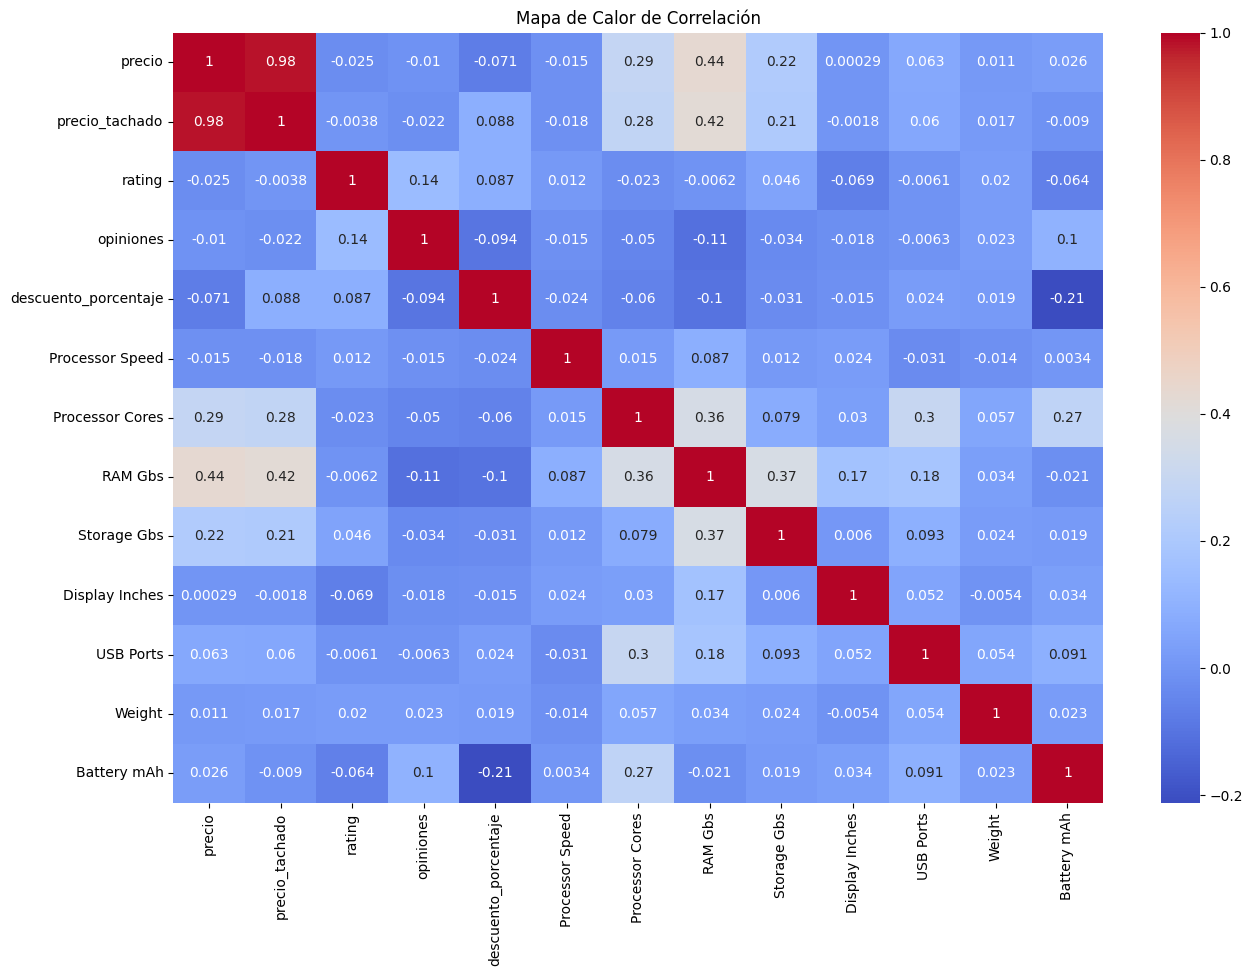

In [33]:
df_numerico = df_merged.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10)) 
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [34]:
px.histogram(data_frame = df_merged, 
             x          = "precio",
             nbins      = 40)

In [35]:
df_merged["precio_log"] = np.log1p(df_merged["precio"])  

# Graficar la distribución normalizada
fig = px.histogram(data_frame=df_merged, 
                   x="precio_log", 
                   nbins=40, 
                   title="Histograma del Precio (Escala Logarítmica)")
fig.show()

In [39]:
df_merged.columns

Index(['timestamp', 'nombre', 'precio', 'precio_tachado', 'rating',
       'opiniones', 'descuento_porcentaje', 'marca', 'Processor Speed',
       'Processor Cores', 'RAM Gbs', 'Storage Gbs', 'Display Inches',
       'GPU Model', 'USB Ports', 'Operating System', 'Weight', 'Battery mAh',
       'categoria', 'precio_log'],
      dtype='object')

In [45]:
fig = go.Figure()

for categoria in df_merged['categoria'].unique():
    df_filtrado = df_merged[df_merged['categoria'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['rating'],
        y=df_filtrado['precio'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Precio - Rating',
    xaxis_title='Precio',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

In [48]:
fig = go.Figure()

for categoria in df_merged['categoria'].unique():
    df_filtrado = df_merged[df_merged['categoria'] == categoria]
    fig.add_trace(go.Scatter(
        x=df_filtrado['opiniones'],
        y=df_filtrado['rating'],
        mode='markers',
        name=categoria
    ))

fig.update_layout(
    title='Gráfico de Dispersión por Categoría: Opiniones - Rating',
    xaxis_title='opiniones',
    yaxis_title='Rating',
    template='plotly_dark'
)

fig.show()

In [50]:
px.histogram(data_frame = df_merged,
             x          = "rating",
             color      = "categoria",
             title      = "Histograma de Rating por Categoría",
             template   = "plotly_dark")

In [52]:
px.scatter_3d(data_frame = df_merged,
              x          = "precio",
              y          = "rating",
              z          = "opiniones",
              color      = "categoria"
              )

In [53]:
px.histogram(data_frame = df_merged,
                x          = "descuento_porcentaje",
                color      = "categoria",
                title      = "Histograma de Descuento por Categoría",
                template   = "plotly_dark")

In [55]:
df_merged["descuento_porcentaje_log"] = np.log1p(df_merged["descuento_porcentaje"])
df_merged["rating_log"] = np.log1p(df_merged["rating"])
df_merged["opiniones_log"] = np.log1p(df_merged["opiniones"]) 

In [57]:

df_filtrado1 = df_merged[df_merged["descuento_porcentaje_log"] > 0]


fig = px.histogram(
    data_frame=df_filtrado1,
    x="descuento_porcentaje_log",
    color="categoria",
    title="Histograma de Descuento por Categoría (Sin Outliers en 0)",
    template="plotly_dark"
)

fig.show()

In [58]:
px.scatter_3d(data_frame = df_merged,
              x          = "precio_log",
              y          = "rating_log",
              z          = "opiniones_log",
              color      = "categoria"
              )